In [1]:
# import supporting libraries
import cv2
from matplotlib import pyplot as plt
import numpy as np
import os

In [2]:
# Specify paths for model files
proto_file = 'D:/NobleTasks/ComputerVision/colorization_deploy_v2.prototxt'
weights_file = 'D:/NobleTasks/ComputerVision/colorization_release_v2.caffemodel'
npy_file = 'D:/NobleTasks/ComputerVision/pts_in_hull.npy'

# Verify the existence of the files
if not os.path.isfile(proto_file):
    raise FileNotFoundError(f"{proto_file} not found.")
if not os.path.isfile(weights_file):
    raise FileNotFoundError(f"{weights_file} not found.")
if not os.path.isfile(npy_file):
    raise FileNotFoundError(f"{npy_file} not found.")

# Read in the pretrained model
model = cv2.dnn.readNetFromCaffe(proto_file, weights_file)

# Load the bin centers
pts_in_hull = np.load(npy_file)

# Populate cluster centers as 1x1 convolution kernel
pts_in_hull = pts_in_hull.transpose().reshape(2, 313, 1, 1)
model.getLayer(model.getLayerId('class8_ab')).blobs = [pts_in_hull.astype(np.float32)]
model.getLayer(model.getLayerId('conv8_313_rh')).blobs = [np.full([1, 313], 2.606, np.float32)]

print("Model and bin centers loaded successfully.")


Model and bin centers loaded successfully.


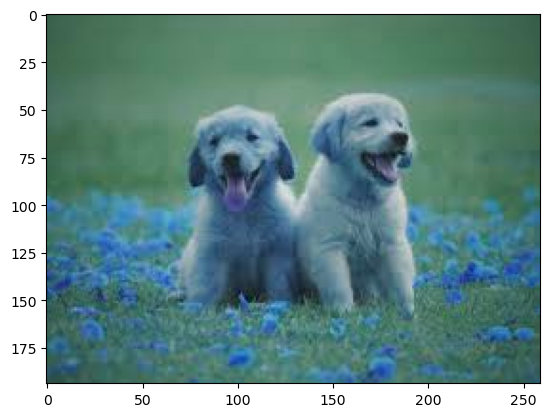

In [3]:
# read the image
image = cv2.imread("C:/Users/sandi_jue4fwh/Downloads/Dog.jpeg")
plt.imshow(image)

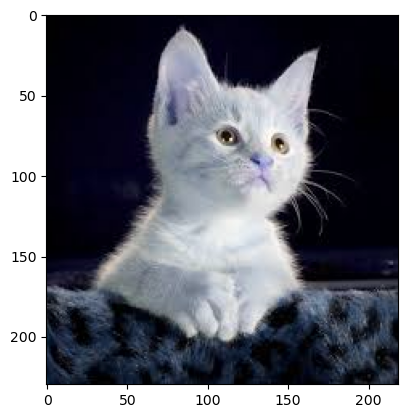

In [4]:
# read the image
image1 = cv2.imread("C:/Users/sandi_jue4fwh/Downloads/cat.jpeg")
plt.imshow(image1)

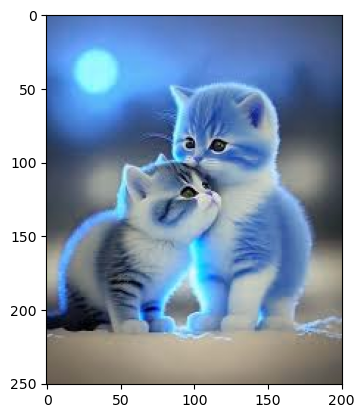

In [5]:
# read the image
image2 = cv2.imread("C:/Users/sandi_jue4fwh/Downloads/cat1.jpeg")
plt.imshow(image2)

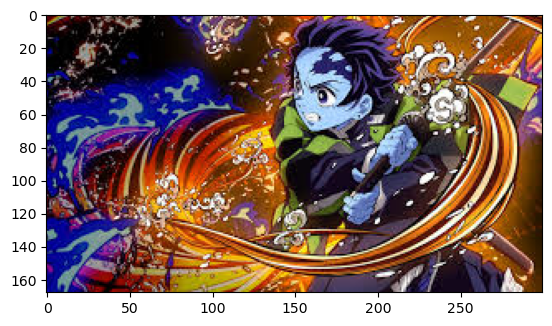

In [6]:
# read the image
image3 = cv2.imread("C:/Users/sandi_jue4fwh/Downloads/Tanjiro2.jpeg")
plt.imshow(image3)

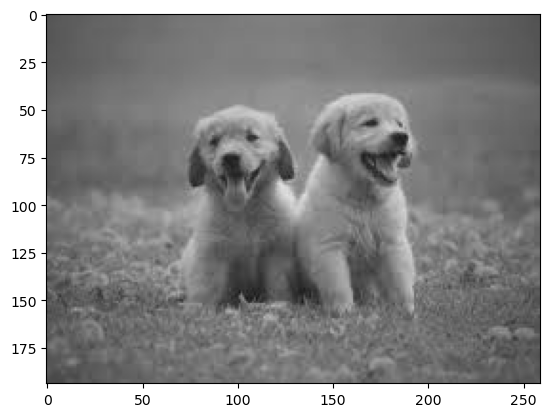

In [7]:
# show the image
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # read it as rgb due to conversion at the bottom
image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

# plt.imshow(image, cmap='gray')
plt.imshow(image)

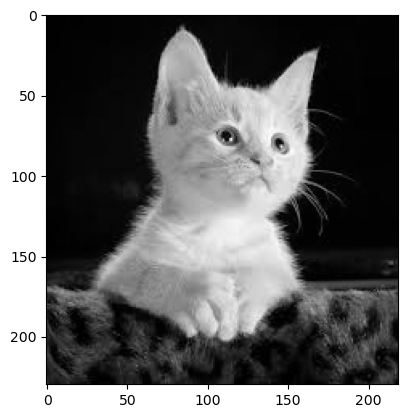

In [8]:
# show the image
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)  # read it as rgb due to conversion at the bottom
image1 = cv2.cvtColor(image1, cv2.COLOR_GRAY2RGB)

# plt.imshow(image, cmap='gray')
plt.imshow(image1)

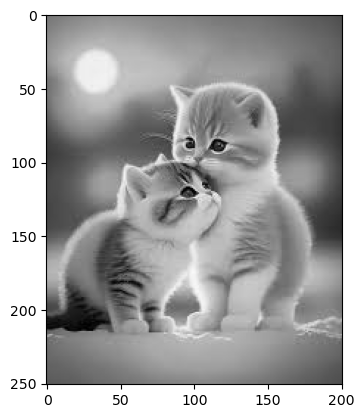

In [9]:
# show the image
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)  # read it as rgb due to conversion at the bottom
image2 = cv2.cvtColor(image2, cv2.COLOR_GRAY2RGB)

# plt.imshow(image, cmap='gray')
plt.imshow(image2)

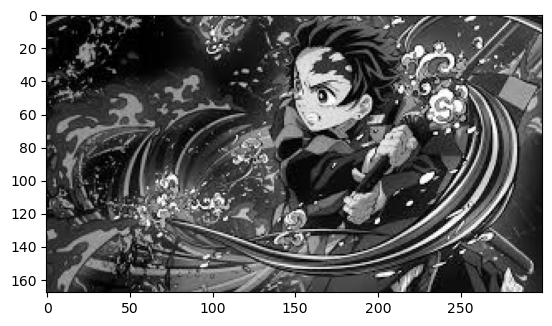

In [10]:
# show the image
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)  # read it as rgb due to conversion at the bottom
image3 = cv2.cvtColor(image3, cv2.COLOR_GRAY2RGB)

# plt.imshow(image, cmap='gray')
plt.imshow(image3)

In [11]:
#Convert the rgb values of the input image to the range of 0 to 1
print(image2.shape)
img_rgb2 = (image2[:,:,[2, 1, 0]] * 1.0 / 255).astype(np.float32)
img_lab2 = cv2.cvtColor(img_rgb2, cv2.COLOR_RGB2Lab)
img_l2 = img_lab2[:,:,0] # pull out L channel

(251, 201, 3)


In [12]:
# declare input size
w = 224
h = 224
# resize the lightness channel to network input size
img_l_rs2 = cv2.resize(img_l2, (w, h)) - 50 # resize image to network input size


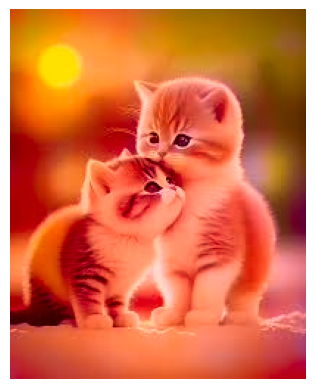

In [13]:
#pass the model
model.setInput(cv2.dnn.blobFromImage(img_l_rs2))

ab_dec = model.forward()[0,:,:,:].transpose((1,2,0)) # this is our result
ab_dec_us = cv2.resize(ab_dec, np.flip(img_rgb2.shape[:2]))

scale_factor = 1.5 
ab_dec_us = ab_dec_us * scale_factor

bias = [40, 10] 
ab_dec_us[:,:,0] += bias[0] 
ab_dec_us[:,:,1] += bias[1]

img_lab_out = np.concatenate((img_l2[:,:,np.newaxis],ab_dec_us),axis=2)
img_bgr_out = np.clip(cv2.cvtColor(img_lab_out, cv2.COLOR_Lab2RGB), 0, 1)

plt.axis('off')
# show the image
plt.imshow(img_bgr_out)